# Group 5
## Team members:
- Jianting Liu(8950907)
- David (8999846) 
- Marieth (9016702)


### Use case

 ## 1. Polynomial Regression (No linear regression)

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# 
df = pd.read_csv("melted_data_1120.csv")
print(df.head())

         Date  Median income    Population  Mortgage Rate  Interest Rate  \
0  2005-01-01         4487.5  1.069167e+07           5.60           2.75   
1  2005-02-01         4487.5  1.069167e+07           5.59           2.75   
2  2005-03-01         4487.5  1.069167e+07           5.60           2.75   
3  2005-04-01         4487.5  1.071352e+07           5.67           2.75   
4  2005-05-01         4487.5  1.071352e+07           5.55           2.75   

  property_type   price  
0    One_storey  207700  
1    One_storey  208400  
2    One_storey  209200  
3    One_storey  210100  
4    One_storey  210600  


### Calculate correlation

Correlation matrix:
               Median income  Population  Mortgage Rate  Interest Rate  \
Median income       1.000000    0.928233      -0.726340      -0.582947   
Population          0.928233    1.000000      -0.813530      -0.612314   
Mortgage Rate      -0.726340   -0.813530       1.000000       0.841515   
Interest Rate      -0.582947   -0.612314       0.841515       1.000000   
price               0.703709    0.780786      -0.579921      -0.414241   

                  price  
Median income  0.703709  
Population     0.780786  
Mortgage Rate -0.579921  
Interest Rate -0.414241  
price          1.000000  


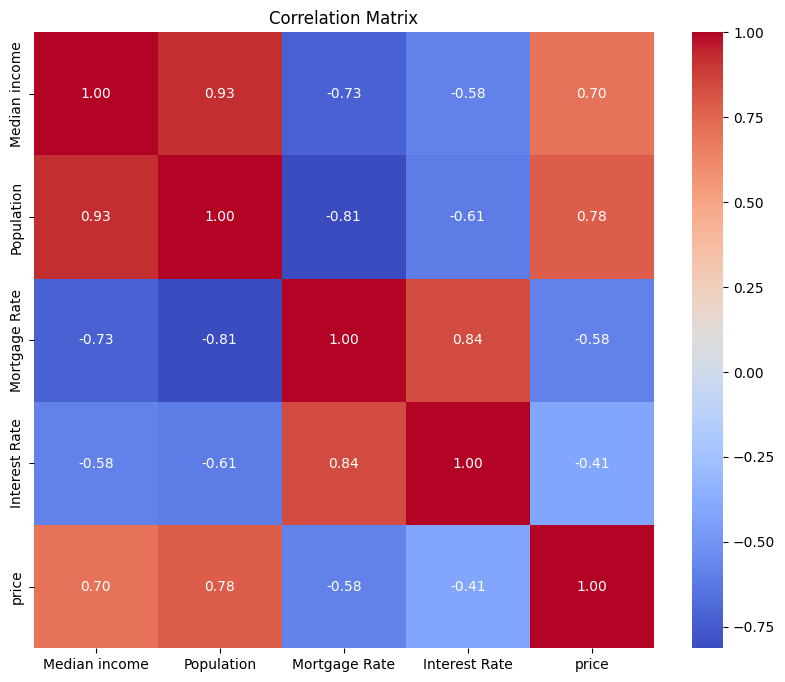

In [3]:
import pandas as pd
import numpy as np

# Since `Date` and `property_type` are non-numeric, we exclude them from the correlation
numeric_columns = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Display the correlation matrix
print("Correlation matrix:")
print(correlation_matrix)

# If you want to visualize it:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

### Trainning the Model

Mean Squared Error: 8316734944.004949
R-squared: 0.62429739262656


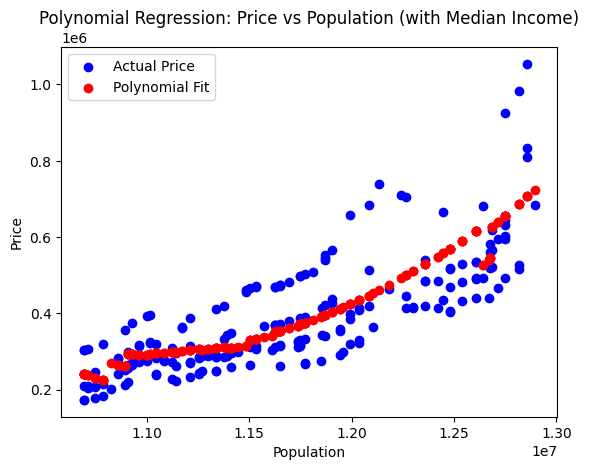

In [49]:
# Independent variables (Population, Median Income) and target variable (price)
X = df[['Population', 'Median income']].values
y = df['price'].values

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create polynomial features (degree 2 for quadratic regression)
poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

# Train the polynomial regression model
model = LinearRegression()
model.fit(X_poly_train, y_train)

# Make predictions
y_pred = model.predict(X_poly_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Plot the result (optional)
plt.scatter(X_test[:, 0], y_test, color='blue', label='Actual Price')  # Population
plt.scatter(X_test[:, 0], y_pred, color='red', label='Polynomial Fit')  # Predictions
plt.xlabel('Population')
plt.ylabel('Price')
plt.title('Polynomial Regression: Price vs Population (with Median Income)')
plt.legend()
plt.show()


 ### 2.  Logistic Regression

### Prepare the dataset

In [35]:
bins = [0, 200000, 210000, 220000, float('inf')]
labels = ['low', 'medium', 'high', 'very_high']
df['price_category'] = pd.cut(df['price'], bins=bins, labels=labels)

In [37]:
print(df.head())

         Date  Median income    Population  Mortgage Rate  Interest Rate  \
0  2005-01-01         4487.5  1.069167e+07           5.60           2.75   
1  2005-02-01         4487.5  1.069167e+07           5.59           2.75   
2  2005-03-01         4487.5  1.069167e+07           5.60           2.75   
3  2005-04-01         4487.5  1.071352e+07           5.67           2.75   
4  2005-05-01         4487.5  1.071352e+07           5.55           2.75   

  property_type   price price_category  
0    One_storey  207700         medium  
1    One_storey  208400         medium  
2    One_storey  209200         medium  
3    One_storey  210100           high  
4    One_storey  210600           high  


In [38]:
df['month'] = pd.to_datetime(df['Date']).dt.month
df['year'] = pd.to_datetime(df['Date']).dt.year


In [39]:
df = pd.get_dummies(df, columns=['property_type'], drop_first=True)

In [40]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['Median income', 'Population', 'Mortgage Rate', 'Interest Rate']] = scaler.fit_transform(df[['Median income', 'Population', 'Mortgage Rate', 'Interest Rate']])


In [41]:
df.head()

,Date,Median income,Population,Mortgage Rate,Interest Rate,price,price_category,month,year,property_type_Composite,property_type_One_storey,property_type_Townhouse,property_type_Two_storey
0,2005-01-01,-1.895491,-1.615949,1.086638,0.839017,207700,medium,1,2005,False,True,False,False
1,2005-02-01,-1.895491,-1.615949,1.076064,0.839017,208400,medium,2,2005,False,True,False,False
2,2005-03-01,-1.895491,-1.615949,1.086638,0.839017,209200,medium,3,2005,False,True,False,False
3,2005-04-01,-1.895491,-1.581883,1.160652,0.839017,210100,high,4,2005,False,True,False,False
4,2005-05-01,-1.895491,-1.581883,1.033770,0.839017,210600,high,5,2005,False,True,False,False


### Calculate correlation

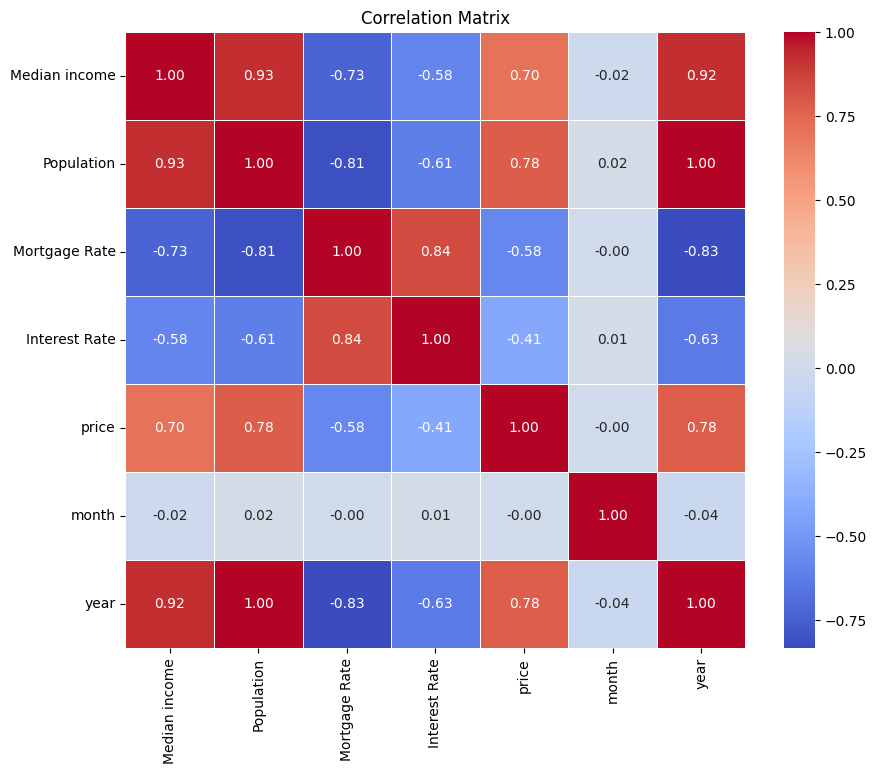

In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_columns = df.select_dtypes(include=[np.number])

# Calculate correlation matrix
correlation_matrix = numeric_columns.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

### Trainning the model

In [14]:
from sklearn.model_selection import train_test_split

# Independent and dependent variables
X = df[['Median income', 'Population', 'Mortgage Rate', 'Interest Rate']]
y = df['price_category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [19]:
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# Make predictions for the test set
y_pred = model.predict(X_test)

# Accuracy score
print("Accuracy:", accuracy_score(y_test, y_pred))

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# If multiclass classification, calculate ROC-AUC (One-vs-Rest strategy)
if hasattr(model, "predict_proba"):
    # For multiclass, predict_proba returns a 2D array with probabilities for all classes
    y_prob = model.predict_proba(X_test)  # probabilities for all classes
    print("ROC-AUC:", roc_auc_score(y_test, y_prob, multi_class='ovr', average='macro'))  # One-vs-Rest strategy
else:
    print("Model does not have predict_proba method.")




Accuracy: 0.9425837320574163
Classification Report:
               precision    recall  f1-score   support

        high       0.00      0.00      0.00         4
         low       0.00      0.00      0.00         4
      medium       0.00      0.00      0.00         4
   very_high       0.94      1.00      0.97       197

    accuracy                           0.94       209
   macro avg       0.24      0.25      0.24       209
weighted avg       0.89      0.94      0.91       209

ROC-AUC: 0.9591850315711279


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  